# **Movie Recommendation Challenge 2023**

# Unsupervised Learning Solution
#### SmartByte - team JM2 EDSA

© Explore Data Science Academy

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2Fbca114f2e4f6b9b46f2cc76527d7401e%2FImage_header.png?generation=1593773828621598&alt=media" width=100%/> 

In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-movie-recommendation-predict/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-predict/movies.csv
/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-predict/train.csv
/kaggle/input/edsa-movie-recommendation-predict/test.csv
/kaggle/input/edsa-movie-recommendation-predict/tags.csv
/kaggle/input/edsa-movie-recommendation-predict/links.csv


# **Recommender System**

In [104]:
!pip install comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 8.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.1/510.1 kB 26.4 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.6.0
    Uninstalling websocket-client-1.6.0:
      Successfully uninstalled websocket-client-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-lsp 4.2.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.


In [105]:
from comet_ml import Experiment
from comet_ml.integration.pytorch import log_model

experiment = Experiment(
  api_key = "O2DQXkha3pCGKtPdWVSve0aKf",
  project_name = "unsupervised-learning",
  workspace="orifuna-oreo"
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/kaggle/working' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/orifuna-oreo/unsupervised-learning/b196c177c3d44022ad3f548208b4b075



## **Introduction**

In the modern world heavily influenced by technology, recommender systems play a crucial role in enabling individuals to make better choices about the content they consume. This is particularly evident in movie recommendations, where advanced algorithms can assist viewers in discovering excellent films from a vast selection. Therefore, we will develop a recommendation algorithm that combines content-based and collaborative filtering techniques to accurately predict how a user might rate a movie they haven't seen before, based on their past preferences.

## **Problem Statement**

In today's world, several prominent companies dominate various industries, including YouTube, Facebook, Twitter, Netflix, Amazon, LinkedIn, and Google. These giants share a common thread: the utilization of recommendation systems. In the era of Artificial Intelligence, nearly every sector, from government and education to the rapidly expanding entertainment industry, relies heavily on AI technology to enhance their effectiveness.
Therefore, our objective as Smartbyte, is to develop a precise and resilient model that tackles this significant economic opportunity. By implementing our solution, users within our clients' system will enjoy personalized recommendations, fostering a strong connection with the streaming services that best cater to their viewing preferences. This, in turn, will enhance platform affinity among their audience.

## **Supplied data**

* **genome_scores.csv** - A score mapping the strength between movies and tag-related properties.
-**genome_tags.csv** - User assigned tags for genome-related scores.
-**imdb_data.csv** - Additional movie metadata scraped from IMDB using the links.csv file.
-**links.csv** - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
-**sample_submission.csv** - Sample of the submission format for the predict.
-**tags.csv** - User assigned for the movies within the dataset.
-**test.csv** - The test split of the dataset. Contains user and movie IDs with no rating data.
-**train.csv** - The training split of the dataset. Contains user and movie IDs with associated rating data.

# **Content**

1.Import packages

2.Loading Datasets

3.Data Description

4.Exploratory Data Analysis(EDA)

5.Modeling

# **1. Importing packages**

In [106]:
# Install packages here

# Packages for data processing
import numpy as np
import pandas as pd
import datetime
import random
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_html 
from IPython.core.display import HTML
from collections import defaultdict
import datetime
import re
import squarify
import os


# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise import KNNWithMeans, KNNWithZScore
from surprise import KNNBasic, KNNBaseline
from surprise.model_selection import cross_validate, train_test_split
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import NormalPredictor
from surprise import BaselineOnly
import heapq

# **2. Loading Datasets**

In [107]:
sample_submission = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/sample_submission.csv')
movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/movies.csv')
imdb_data = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')
genome_scores = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv')
genome_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv')
train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')
test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/test.csv')
tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/tags.csv')
links = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/links.csv')

# **3. Data Description**

In [108]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      object 
 1   rating  float64
dtypes: float64(1), object(1)
memory usage: 76.3+ MB


In [109]:
movies.info()
movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [110]:
imdb_data.info()
imdb_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant


In [111]:
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


In [112]:
test.info()
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318
...,...,...
5000014,162541,4079
5000015,162541,4467
5000016,162541,4980
5000017,162541,5689


In [113]:
genome_tags.info()
genome_tags

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [114]:
tags.info()
tags

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181


# **4. Data Preprocessing**

### Checking and removing null values from the datasets that we are planning to use

In [115]:
print("No of Null values in our train df : ", sum(train.isnull().any()))

No of Null values in our train df :  0


In [116]:
print("No of Null values in our test df : ", sum(test.isnull().any()))

No of Null values in our test df :  0


In [117]:
print("No of Null values in our movies df : ", sum(movies.isnull().any()))

No of Null values in our movies df :  0


In [118]:
print("No of Null values in our imdb_data df : ", sum(imdb_data.isnull().any()))

No of Null values in our imdb_data df :  5


In [119]:
print("No of Null values in our genome tags df : ", sum(genome_tags.isnull().any()))

No of Null values in our genome tags df :  0


### Checking and removing duplicate values

In [120]:
#Ascertain how many users and movies there are and whether there are any duplicates(within the train dataset)
users = len(train.userId.unique())
items = len(train.movieId.unique())
print('There are {} unique users and {}\
 unique movies train dataset with {} duplicated entries'.format(users, items, train[train.duplicated()].count().sum()))

There are 162541 unique users and 48213 unique movies train dataset with 0 duplicated entries


In [121]:
#Remove duplicate entries for userId, movieId in the test dataset 
duplicate_bool = test.duplicated(['userId','movieId'])
duplicates = sum(duplicate_bool) 
print("There are {} duplicate rating entries in the data..".format(duplicates))

There are 0 duplicate rating entries in the data..


In [122]:
#Remove duplicate entries for movieId, title, genres in the movies dataset 
duplicate_bool = movies.duplicated(['movieId', 'title', 'genres'])
duplicates = sum(duplicate_bool) 
print("There are {} duplicate rating entries in the data..".format(duplicates))

There are 0 duplicate rating entries in the data..


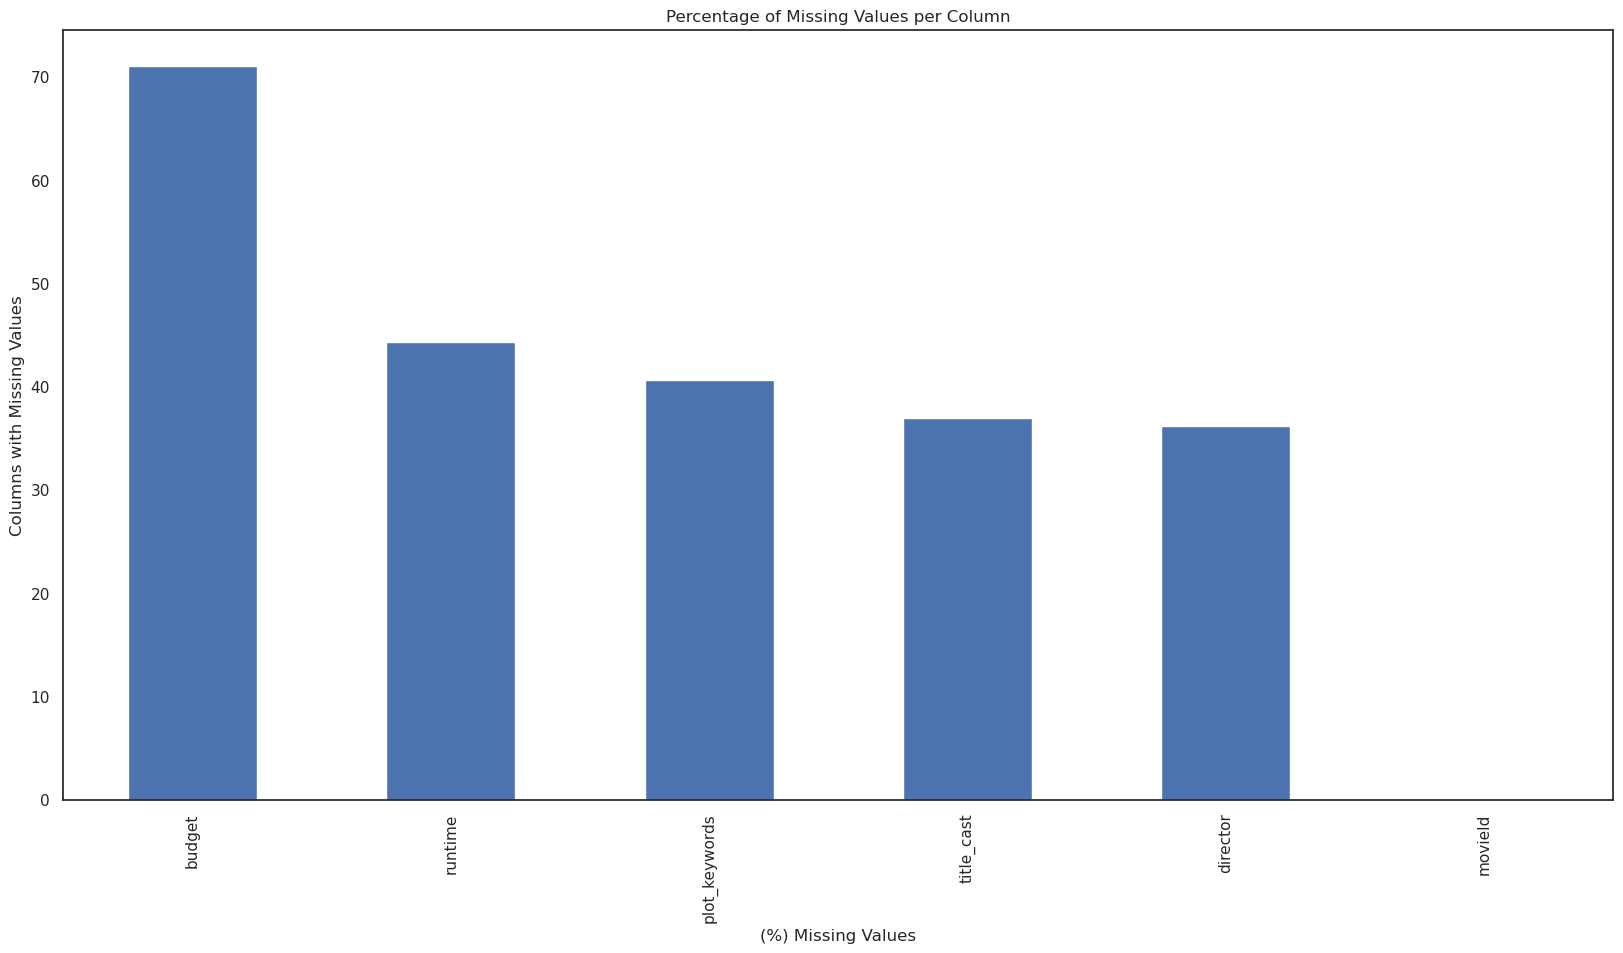

In [123]:
#Calculating the percentage of missing values in each column of the imdb dataset
total = imdb_data.isnull().sum().sort_values(ascending=False)
percent_1 = imdb_data.isnull().sum()/imdb_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2],
                         axis=1, keys=['Total', '(%) missing'])
missing_data['(%) missing'].plot(kind='bar')
plt.xlabel('(%) Missing Values')
plt.ylabel('Columns with Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.show()

**Observations:** It is easily visible from the above chart that there is a large proportion of missing entries across all variables this makes it unfitting for modelling purposes.

In [124]:
# Extract release date (year) from movie titles

# Use regular expression to extract year from paranthesis in movie title 
movies["year"] = movies.title.str.extract("\((\d{4})\)", expand=True)
# Remove parentheses so only year is extracted
movies["year"] = movies.year.str.extract("(\d\d\d\d)", expand=True)
# Remove year from the title column
movies["title"] = movies.title.str.replace("(\(\d\d\d\d\))", "")
# Strip any ending whitespace characters
movies["title"] = movies["title"].apply(lambda x: x.strip())

In [125]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [126]:
# Merge train (users) and movies datasets on movieId column
train_movies_df = pd.merge(train,
                           movies,
                           how='left',
                           on='movieId')

# Perform a further merge with imdb_data on movieId column
movies_metadata_df = pd.merge(train_movies_df,
                              imdb_data,
                              how='left',
                              on='movieId')

movies_metadata_df.head(3)

,userId,movieId,rating,timestamp,title,genres,year,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges,Comedy|Crime|Drama|Thriller,2008,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,106343,5,4.5,1206238739,Father of the Bride Part II,Comedy,1995,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2),Action|Comedy|Sci-Fi,2002,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,88.0,"$140,000,000",lingerie|michael jackson character|shorthaired...


In [127]:
imdb_data['title_cast']=imdb_data['title_cast'].str.split('|') #spliting the title cast into a list
imdb_data['plot_keywords']=imdb_data['plot_keywords'].str.split('|') #spliting the Key words into a list
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


In [128]:
#remove all commas
imdb_data['budget'] = imdb_data['budget'].str.replace(',', '')
#remove all currency signs 
imdb_data['budget'] = imdb_data['budget'].str.extract('(\d+)', expand=False)
#converting feature into a float
imdb_data['budget'] = imdb_data['budget'].astype(float)
#removing NaN values and replacing with 0
imdb_data['budget'] = imdb_data['budget'].replace(np.nan,0)
#converting feature into an integer
imdb_data['budget'] = imdb_data['budget'].astype(int)

In [129]:
imdb_data = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')

In [130]:
imdb_data['title_cast']=imdb_data['title_cast'].str.split('|') #spliting the title cast into a list
imdb_data['plot_keywords']=imdb_data['plot_keywords'].str.split('|') #spliting the Key words into a list
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


In [131]:
#For uniformity and better utilisation on the app. 
## We convert director names into smaller letters and drop nan  values.
imdb_data['director'] = imdb_data['director'].apply(lambda x: x.lower() if x == x else np.nan)

In [132]:
imdb_data['plot_keywords'] = imdb_data['plot_keywords'].dropna()

In [133]:
# This join makes sure imdb is added to movies and all movie rows are kept
movies_imdb = movies.join(imdb_data.set_index('movieId'),on='movieId')
movies_imdb.head()

,movieId,title,genres,year,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",john lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,Jumanji,Adventure|Children|Fantasy,1995,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",jonathan hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,Grumpier Old Men,Comedy|Romance,1995,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",mark steven johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,"[Whitney Houston, Angela Bassett, Loretta Devi...",terry mcmillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,Father of the Bride Part II,Comedy,1995,"[Steve Martin, Diane Keaton, Martin Short, Kim...",albert hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


# **5. Exploratory Data Analysis**

## Plot keywords word clouds

In [134]:
plot_cloud = imdb_data.loc[:,'plot_keywords'] = imdb_data.loc[:, 'plot_keywords'].astype(str)
plot_cloud.dropna()
plot_cloud = [x for x in plot_cloud if str(x) != 'nan']
title_corpus = ' '.join(movies['title'])
plot_corpus = ' '.join(plot_cloud)

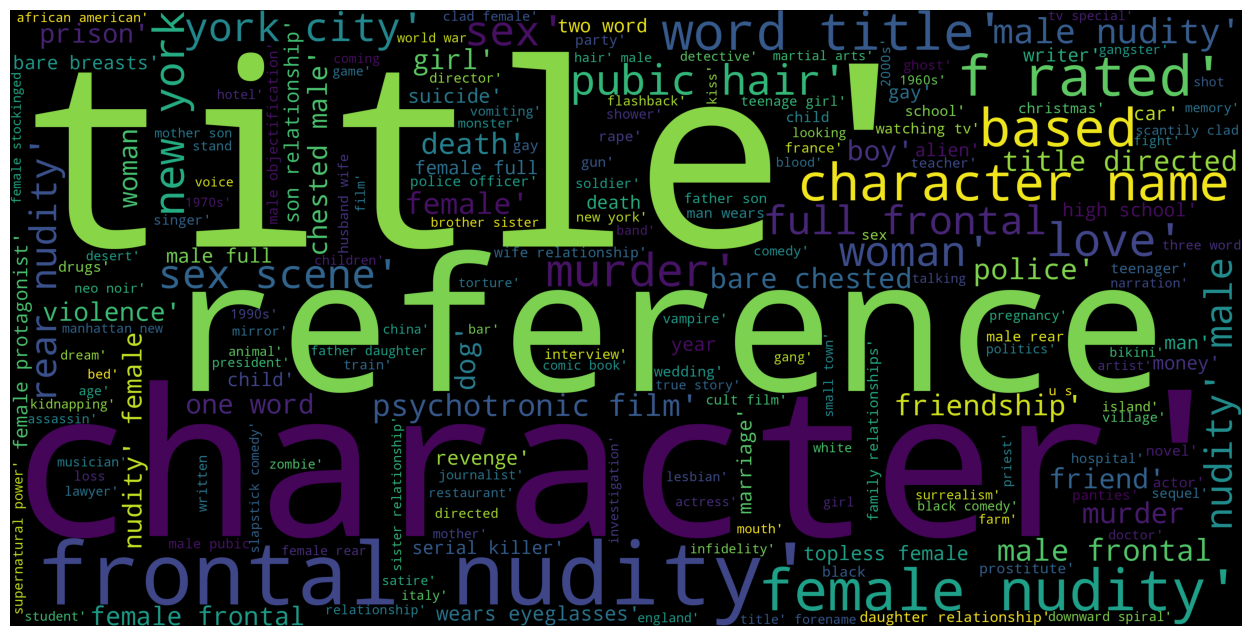

In [135]:
# Generate wordcloud for the plot keywords of movies
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(plot_corpus)
plt.figure(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.show()

**Observation:**

We observe that there is an emphasis on words such as 'nudity'and 'love '. Emphasis on the location 'New York'.

## **Genres**

In [136]:
movies_gg = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/movies.csv')

In [137]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies_gg[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


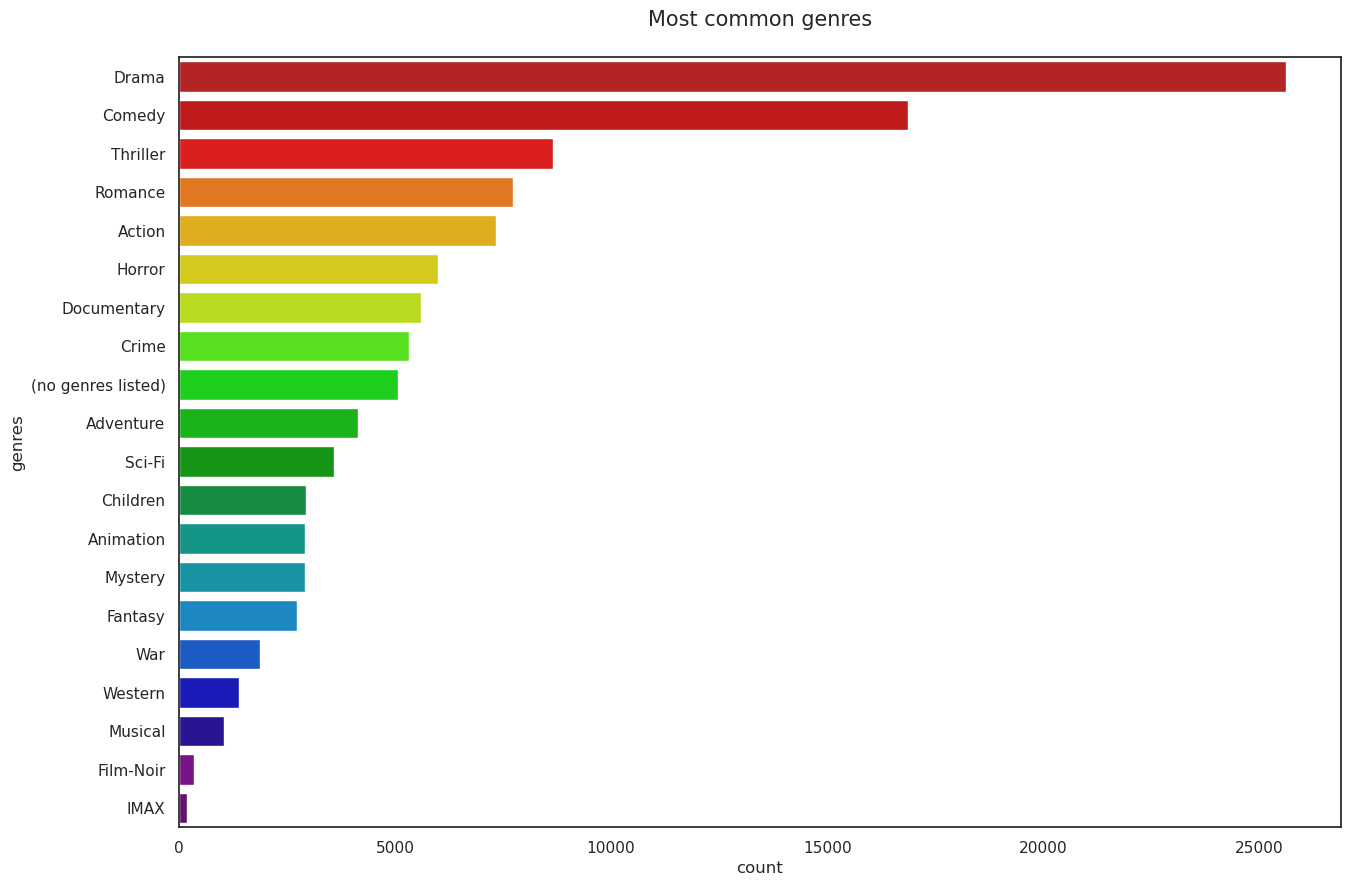

In [138]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=15)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette="nipy_spectral_r")
plt.show()

**Observation:** 

Drama is the most popular genre with almost half the movies identifying as a drama film. The second one Comedy followed by Thriller, Romance, Action, Horror, Documentary, Crime, Adventure, Science Fiction, Children, Animation, Mystery and Fantasy. IMAX is the least common genre as it is the most expensive so fewer people watch it, it is also only available at the cinema and not streaming platforms such as Netflix.

## **Ratings**

Average rating in the dataset: 3.5333951730983424


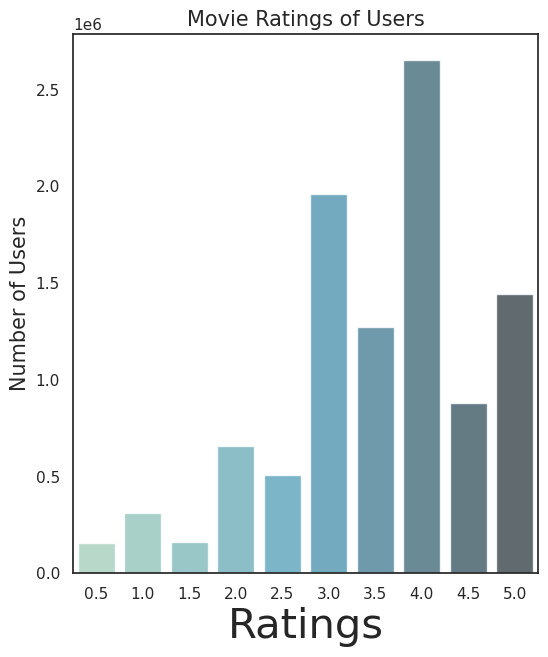

In [139]:
print (f'Average rating in the dataset: {np.mean(train["rating"])}')

#bar graph plot to show the ratings of movies given by users
cnt_srs = train['rating'].value_counts()

plt.figure(figsize=(6,7))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha=0.8,palette='GnBu_d')
plt.title('Movie Ratings of Users', fontsize=15)
plt.ylabel('Number of Users', fontsize=15)
plt.xlabel('Ratings', fontsize=30)
plt.xticks([0,1,2,3,4,5,6,7,8,9],['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'])
plt.show()

**Observation:** 

The average rating of around 3.5 indicates that users generally have a positive inclination towards their ratings and are not overly critical in their feedback. Ratings below 2.0 are relatively uncommon. Another plausible explanation could be that users only rate movies they enjoy, leading to fewer ratings for unenjoyable ones. Personally, I've left a movie theater just 15 minutes into a bad film, considering it a waste of time and accepting the movie ticket cost as unrecoverable. The most common rating in the chart is 4.0, suggesting that users often provide whole-number ratings (e.g., 4.0) rather than fractional ratings (e.g., 3.5).

In [140]:
# Calculate average rating for each movie and arrange from highest to lowest
movies_ranking = movies_metadata_df[['title','rating']].groupby('title').mean().sort_values('rating', ascending=False)

In [141]:
movies_ranking['No_of_ratings'] = movies_metadata_df.groupby('title')['rating'].count()

In [142]:
a = movies_ranking.sort_values(by=['No_of_ratings', 'rating'], ascending=False).head()

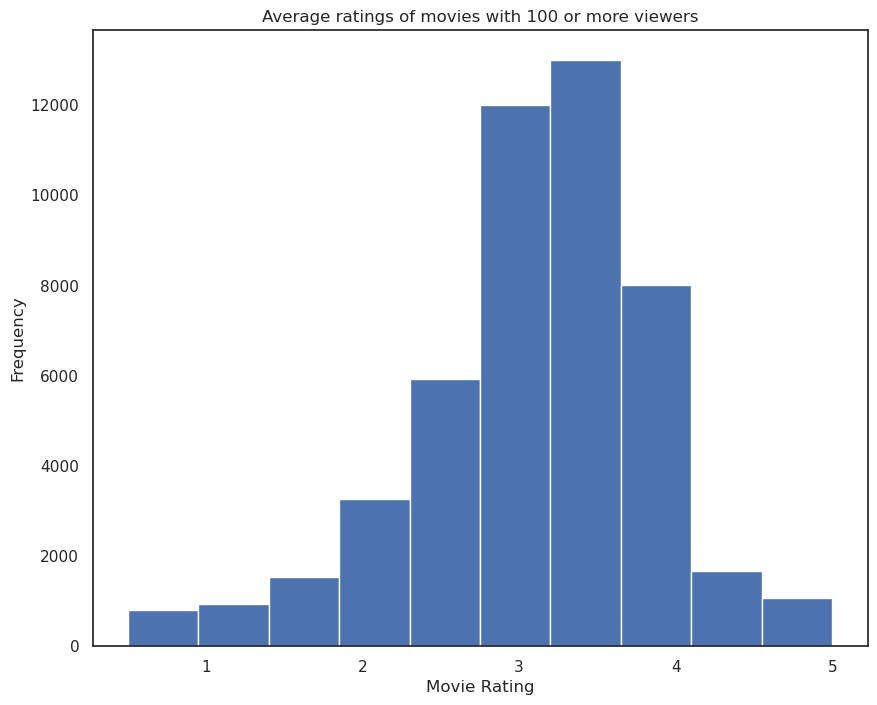

In [143]:
# Average rating of movies in the dataset
avg_rating = train.groupby('movieId')['rating'].mean()

# Plotting the results
plt.figure(figsize=(10,8))
avg_rating.plot(kind='hist')
plt.ylabel('Frequency')
plt.xlabel('Movie Rating')
plt.title('Average ratings of movies with 100 or more viewers')
plt.show()

**Observation:** 

Most of the movies are not common and were watched by a few number of people, so even if two people rated the movie 5 stars it wouldn't be enough to classify a movie as a 5 star rated movie so 100 is a fair number.

Most people rated the movie between 3 and 4 because they probably felt that a rating of 5 would be overrating the movie.

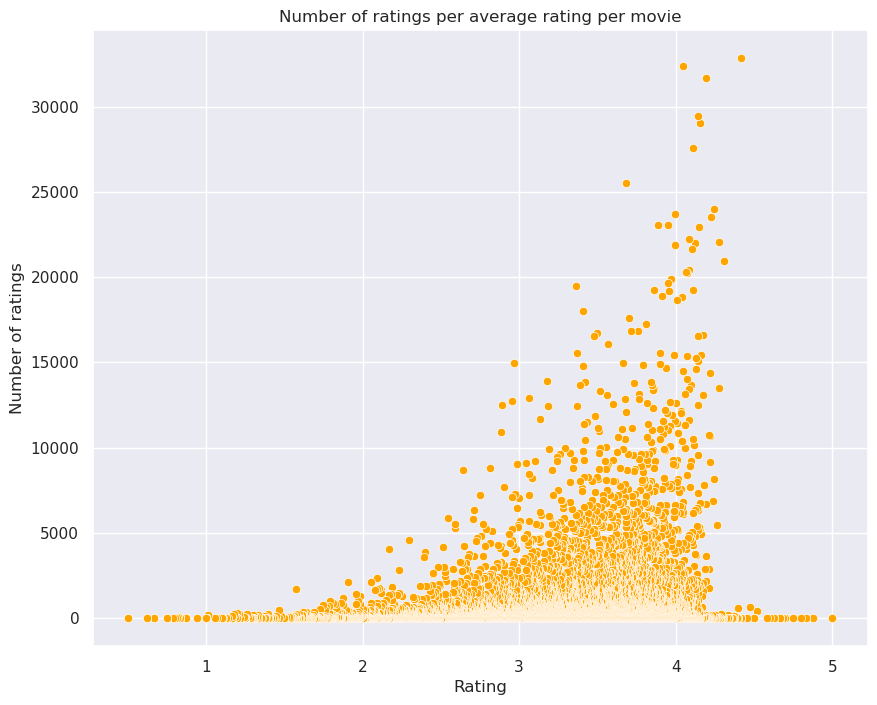

In [144]:
# Set plot size
sns.set(rc={'figure.figsize':(10,8)})

# Plot Number of rating for every rating category.
sns.scatterplot(x='rating', y='No_of_ratings', data=movies_ranking, color='orange')
plt.title('Number of ratings per average rating per movie')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.show()

**Observation:** 

The above plot shows that movies that receive a higher number of ratings also tend to receive higher rating scores, lending further credence to the belief that popular movies (high number of views) are more highly rated. In the plot below, it can be seen that movies with more than 100 ratings obtain a rating of 3.5 as their mode.

The ratings do not start from zero because the minimum rating one can give is 0.5 or 1 star.

The table below shows the correlation between ratings count and rating (score) for each movie director. Those directors whose movies have received the most number of ratings typically also get higher rating scores for their movies.

In [145]:
best_director = pd.DataFrame(movies_metadata_df.groupby('director')['rating'].mean().
                             sort_values(ascending=False))
best_director['No_of_ratings'] = movies_metadata_df.groupby('director')['rating'].count()
best_director.sort_values(by=['No_of_ratings', 'rating'], ascending=False).head(10)

,rating,No_of_ratings
director,,
Quentin Tarantino,3.936571,109919
Michael Crichton,3.273370,65157
J.R.R. Tolkien,4.080118,62963
Lilly Wachowski,3.808348,60988
Stephen King,4.049956,59903
Ethan Coen,3.947250,51185
James Cameron,3.687102,51178
Luc Besson,3.749676,44015
Jonathan Nolan,4.100516,42645


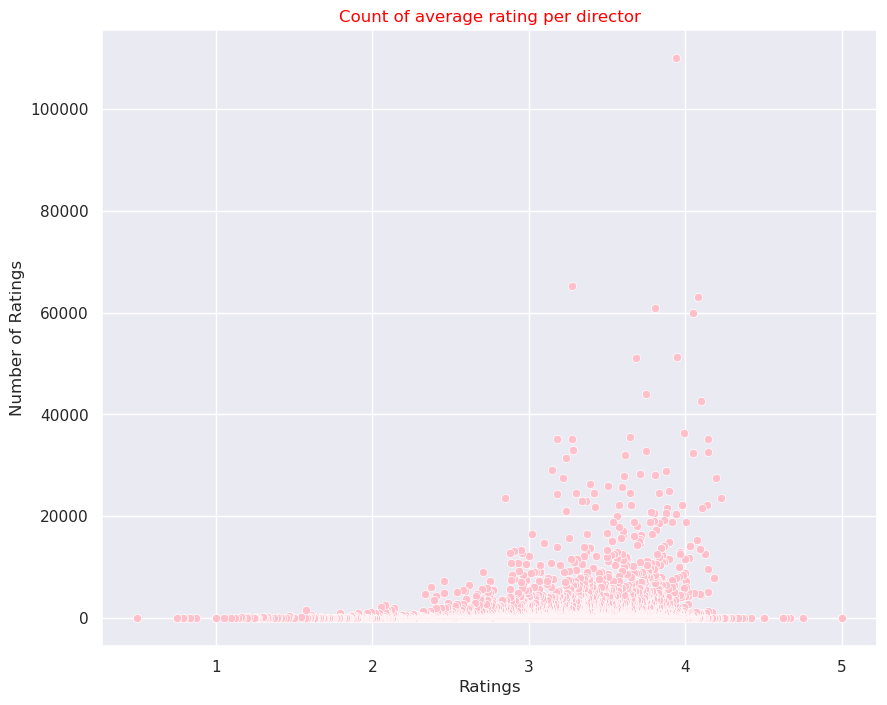

In [146]:
#A visual indication of the correlation between number of ratings and rating scores for directors.

# Set plot size
sns.set(rc={'figure.figsize':(10,8)})

sns.scatterplot(x = 'rating', y = 'No_of_ratings', data = best_director, color='pink').set_title('Count of average rating per director', color='red')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.show()

**Observation:** 

A majority of people who gave ratings gave a rating of above 2.5. Most people rate a movie based on the director and not the content therefore we would assume that they felt a rating of between 3 and 4 is more appropriate. 

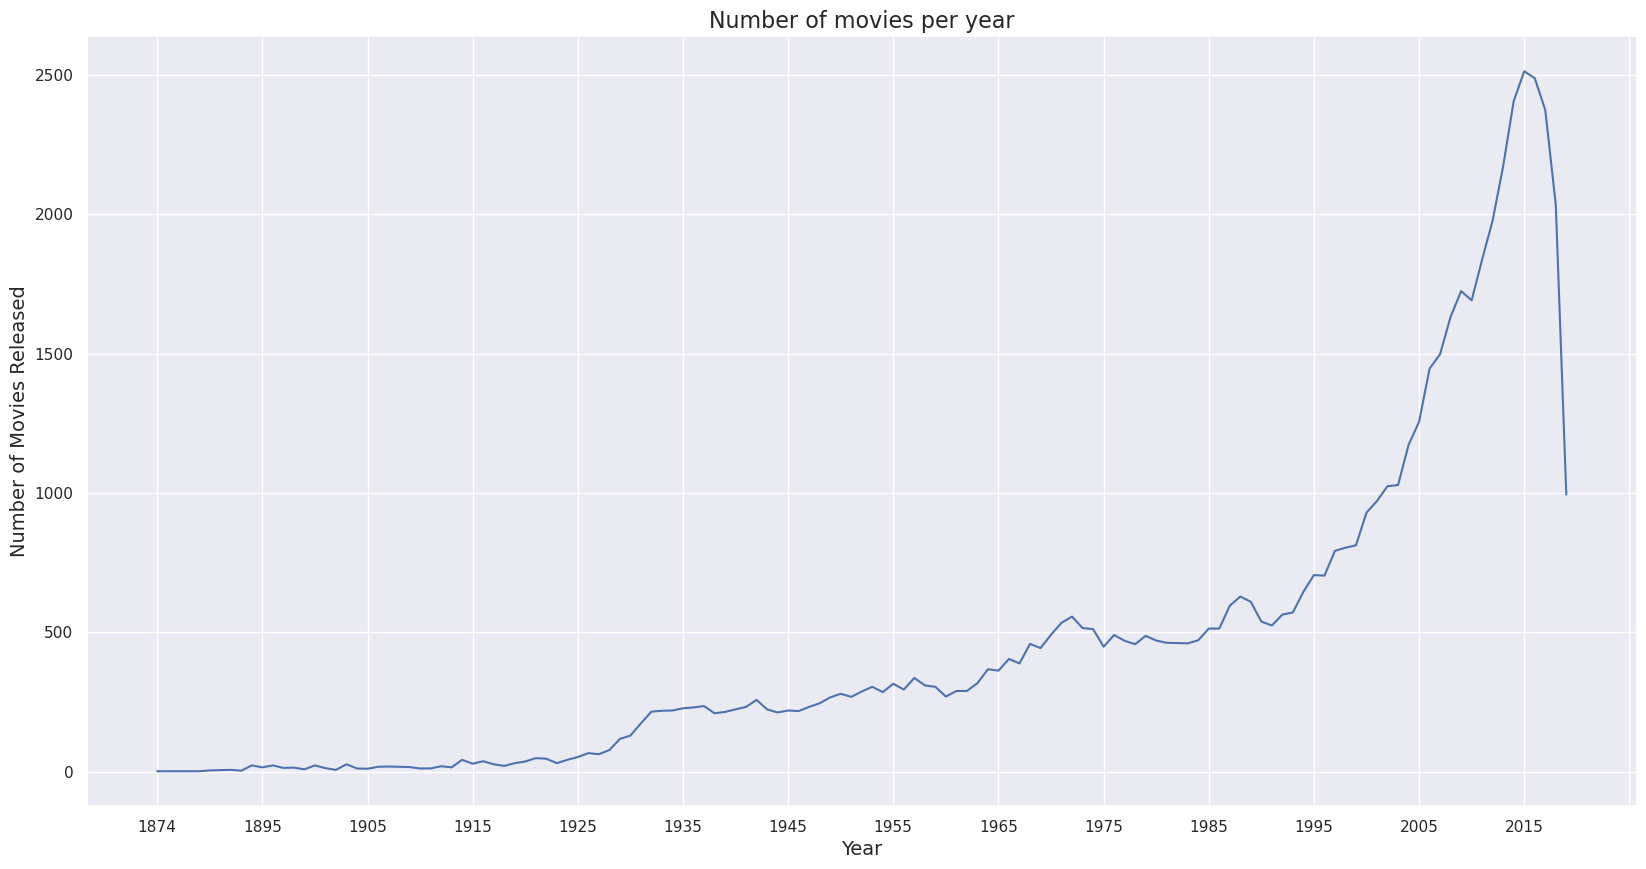

In [147]:
# return number of rows by the year 
year_counts = movies[["title", "year"]].groupby("year").size()

fig, ax = plt.subplots(figsize=(20, 10)) 
ax.plot(year_counts.index, year_counts.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # changes the number of xticks we see
plt.title("Number of movies per year", fontsize=16)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Number of Movies Released", fontsize=14)
plt.show()

**Observations:**

We see that as the years go by, the total number of movies released per year increased. This might be from the fact that as the technology advances, the more movies are released and also more money is generated through the movie industries so everyone will want to release their movies

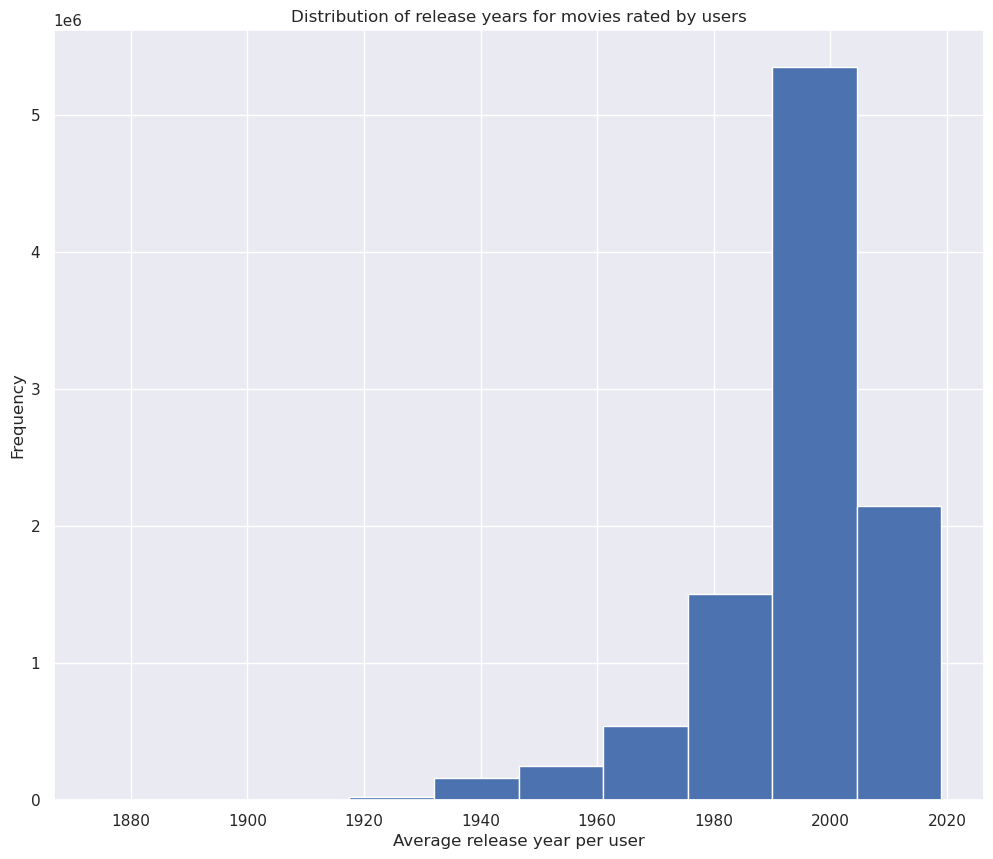

In [148]:
# Create 'year' df that averages release year for each user
years = pd.merge(train, movies, on='movieId')[['userId','year']].dropna()
years['year'] = years['year'].astype('int64')
years.groupby('userId').mean()

# Set plot size
sns.set(rc={'figure.figsize':(20,10)})

plt.figure(figsize=(12,10))
years['year'].plot(kind='hist', color = 'orange')
plt.ylabel('Frequency')
plt.xlabel('Average release year per user')
plt.title('Distribution of release years for movies rated by users')
plt.show()

The above graph shows an increasing trend in movie releases since 1995.The years 2015 and 2016 are the years where the highest number of movies were released.What the diagram above communicates to us is that as the years progress, the amount of movies being released have significantly increased.

An indication as to how rating counts vary by day of week

In [149]:
# Convert the timestamp values into datetime format
train['timestamp'] = pd.to_datetime(train['timestamp'], unit='ms')
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1970-01-18 13:45:49.992
1,106343,5,4.5,1970-01-14 23:03:58.739
2,146790,5459,5.0,1970-01-13 10:56:55.539
3,106362,32296,2.0,1970-01-17 11:17:22.565
4,9041,366,3.0,1970-01-10 15:29:35.837


In [150]:
# Extract the day of the week from the newly-formatted timestamp column
train['day_of_week'] = train['timestamp'].dt.dayofweek
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
train['day_of_week'] = train['day_of_week'].apply(lambda x: days[x])
train.tail()

,userId,movieId,rating,timestamp,day_of_week
10000033,136395,99114,5.0,1970-01-18 14:33:55.092,Sun
10000034,140078,553,3.0,1970-01-12 14:29:40.977,Mon
10000035,154807,56782,4.0,1970-01-15 05:01:14.807,Thur
10000036,85805,327,4.0,1970-01-18 03:05:21.530,Sun
10000037,139457,1009,4.0,1970-01-10 22:36:24.862,Sat


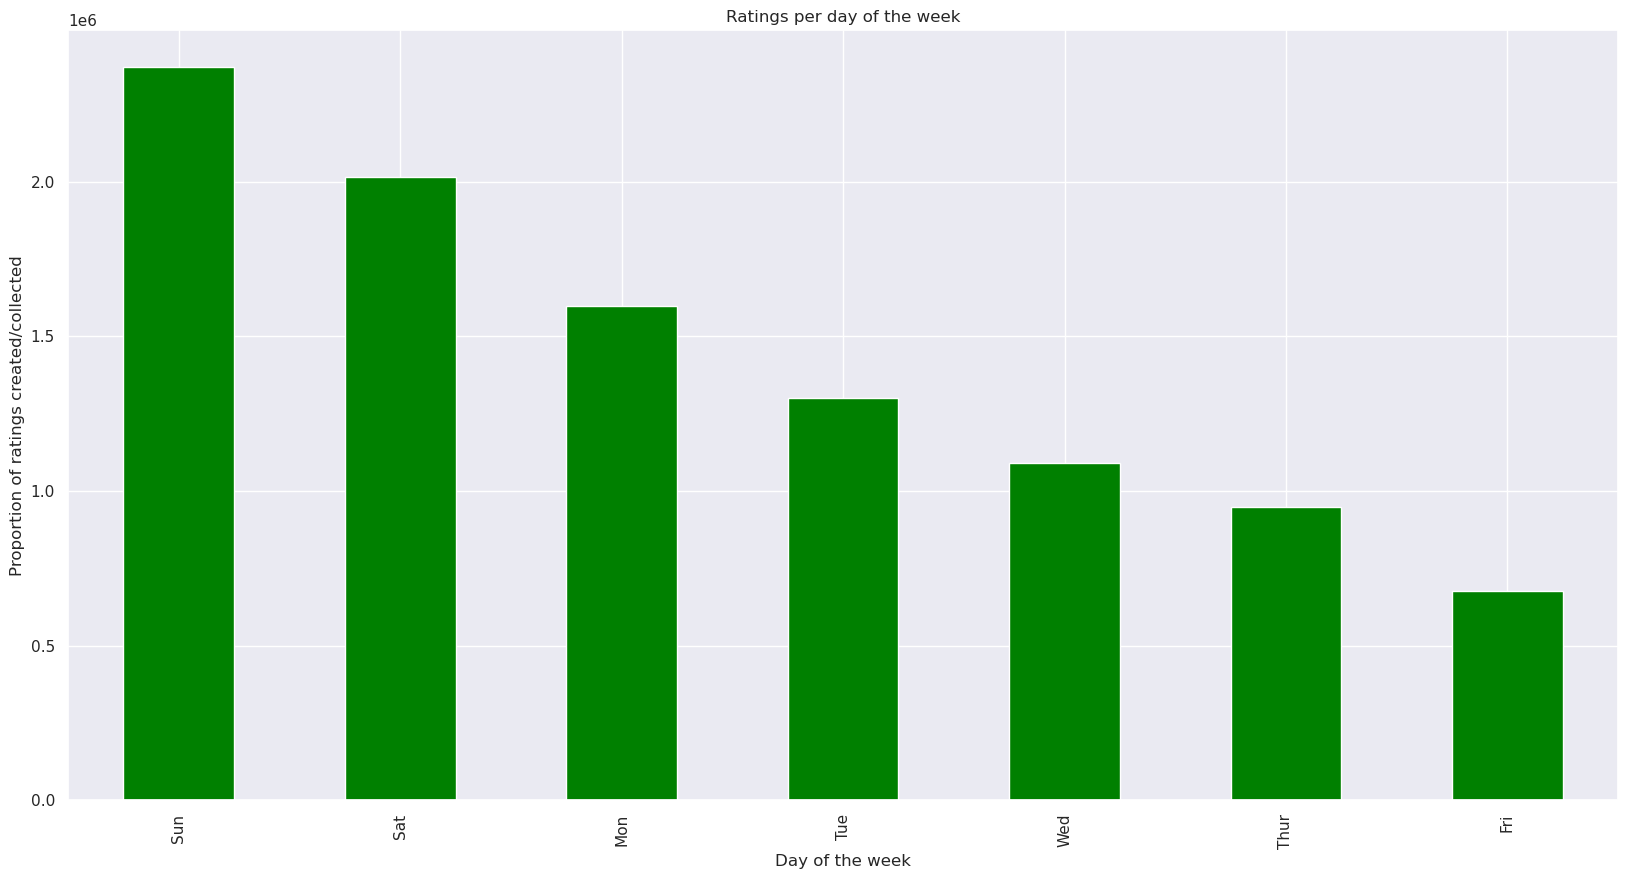

In [151]:
# Plot number of ratings by day of week
train['day_of_week'].value_counts().plot(kind='bar', color = 'green')
plt.title('Ratings per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Proportion of ratings created/collected')
plt.show()

We calcated the average rating for each day of the week and we can see that we receive the most ratings on a Sunday and on a Saturday. As that would be the time that users are more settled at home, because it would be end of week and thats the time that most users would have time to watch movies.

#### <b>Top 10 Total Number of ratings per Movie

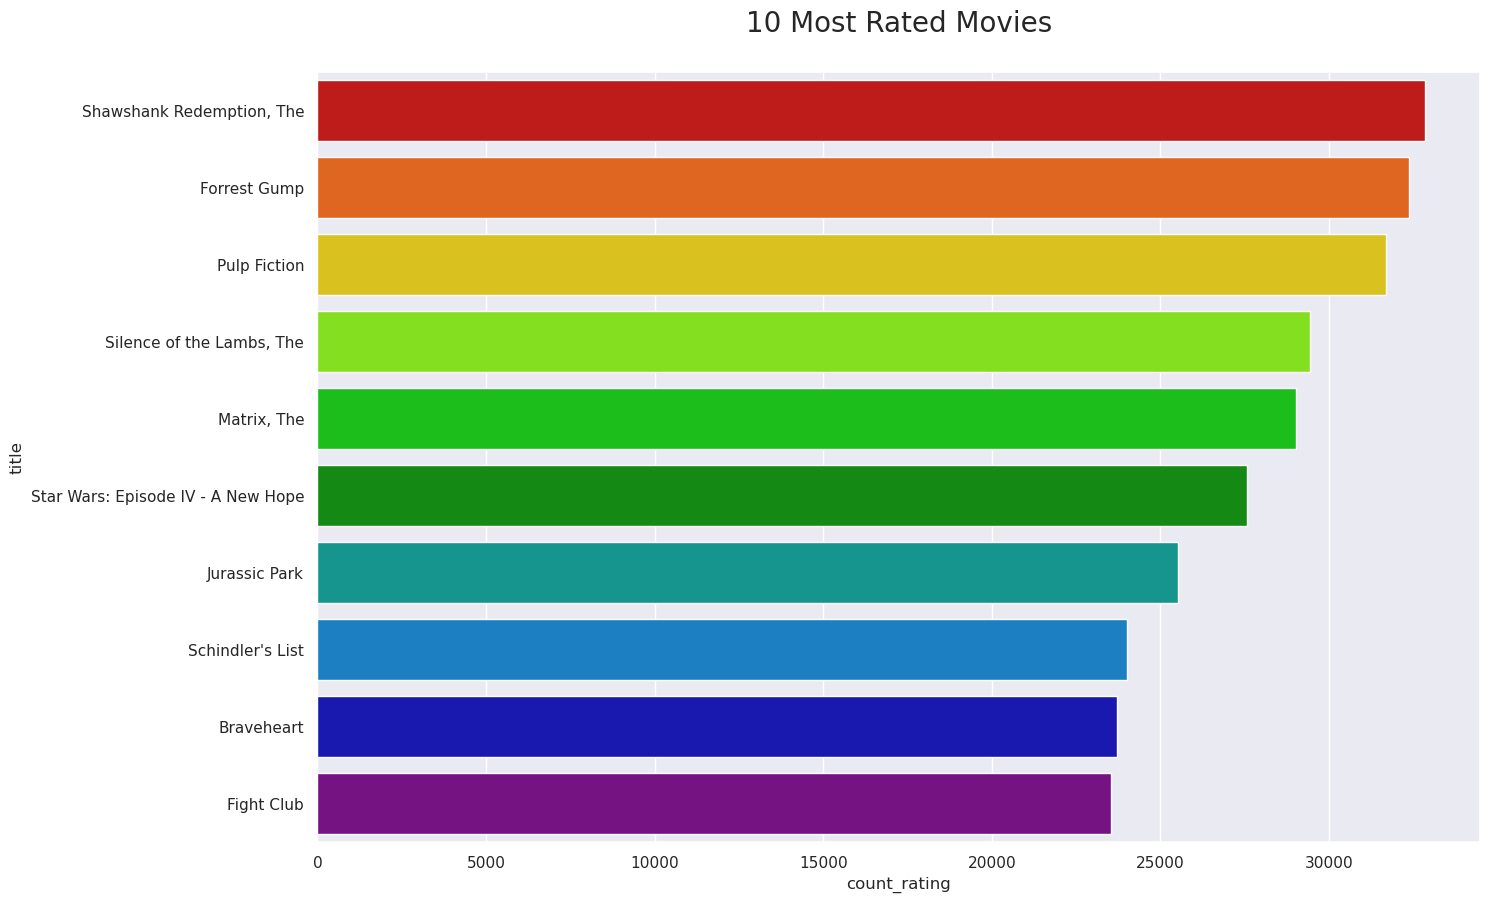

In [152]:
# 10 Most Rated Movies
data = train.groupby('movieId')['rating'].size().sort_values(ascending=False)
da = {'count_rating': data.values, 'movieId': data.index}
# Create DataFrame.
df = pd. DataFrame(da)
df = df[:10]
df = pd.merge(df,movies)

# Plot the 10 Most Rated Movies
plot = plt.figure(figsize=(15, 10))
plt.title('10 Most Rated Movies\n', fontsize=20)
sns.barplot(y="title", data=df,
              x = 'count_rating',
              palette="nipy_spectral_r")
plt.show()

**Observation:** The most rated movie 'The Shawshank redemption' is a movie about Andy Dufresne (Tim Robbins)  who is sentenced to two consecutive life terms in prison for the murders of his wife and her lover and is sentenced to a tough prison. However, only Andy knows he didn't commit the crimes. While there, he forms a friendship with Red (Morgan Freeman), experiences brutality of prison life, adapts, helps the warden, etc., all in 19 years. It truly is a timeless movie .I've watched it and i really enjoyed and I'm definitely giving it a 5.

#### <b>10 Least Rated Movies

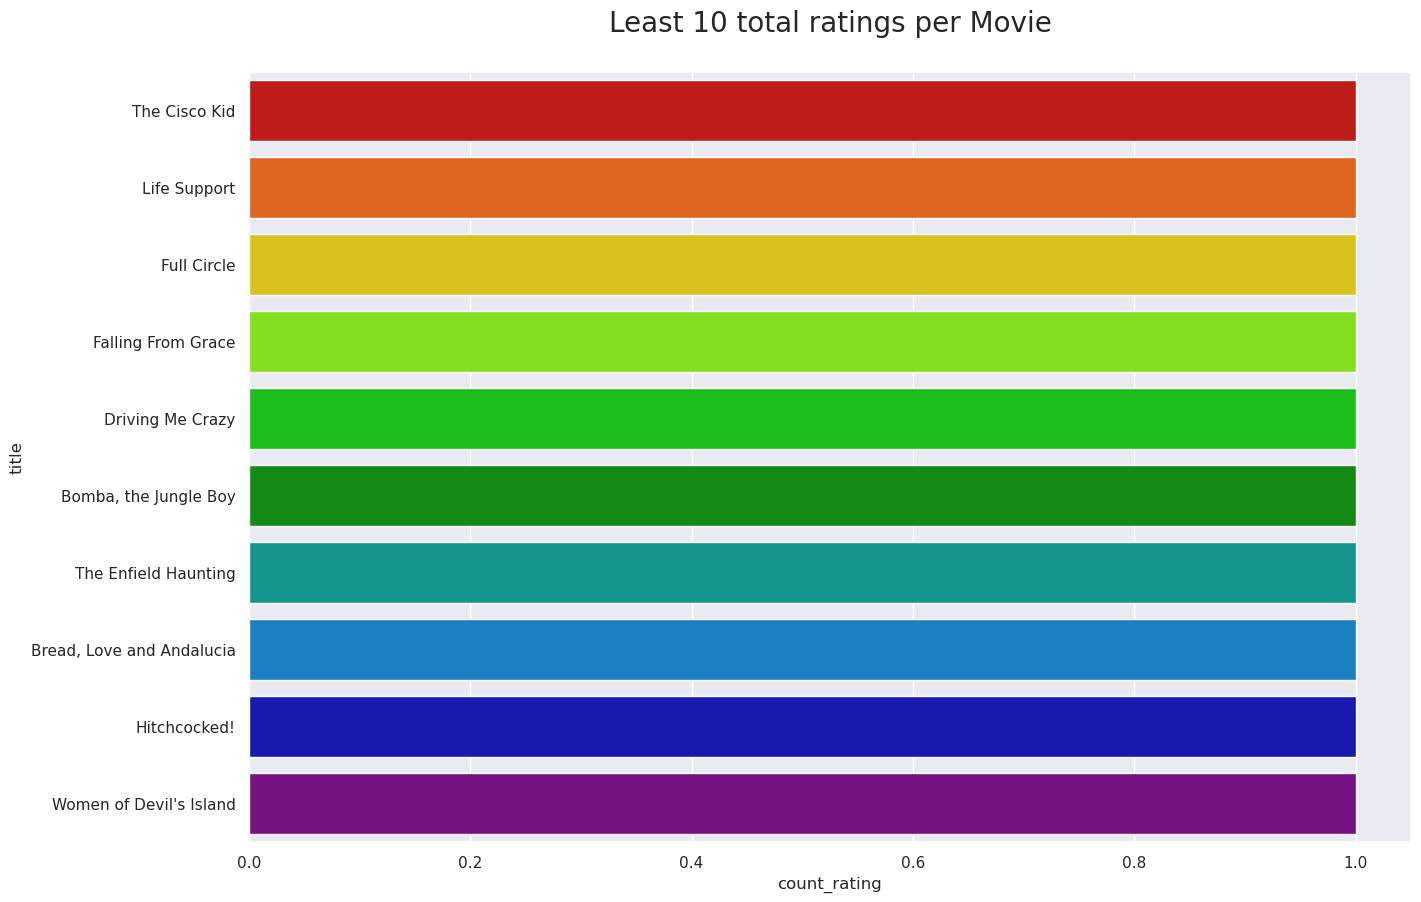

In [153]:
# 10 Least Rated Movies
data = train.groupby('movieId')['rating'].size().sort_values(ascending=False)
da = {'count_rating': data.values, 'movieId': data.index}
# Create DataFrame.
df = pd. DataFrame(da)
df = df[-10:]
df = pd.merge(df,movies)

# Plot the 10 Least Rated Movies
plot = plt.figure(figsize=(15, 10))
plt.title('Least 10 total ratings per Movie\n', fontsize=20)
sns.barplot(y="title", data=df,
              x = 'count_rating',
              palette="nipy_spectral_r")
plt.show()

**Observation:** The movies with the lowest ratings are movies that mostly portray strange situations, surprises, surrealism, plot twists, black humor. We would assume that a large number of people are not comfortable with those type of movies.

In [154]:
#Create variable "budget_per_genre"
budget_per_genre=movies_imdb[['genres','budget']].explode('genres')
budget_per_genre['budget']=budget_per_genre['budget'].str.replace(',', "").str.extract('(\d+)', expand=False).astype('float')

In [155]:
budget_per_genre

,genres,budget
0,Adventure|Animation|Children|Comedy|Fantasy,30000000.0
1,Adventure|Children|Fantasy,65000000.0
2,Comedy|Romance,25000000.0
3,Comedy|Drama|Romance,16000000.0
4,Comedy,30000000.0
...,...,...
62418,Drama,NaN
62419,Documentary,NaN
62420,Comedy|Drama,NaN
62421,(no genres listed),NaN


In [156]:
budget_per_genre.genres = budget_per_genre.genres.apply(lambda x: x.split('|'))


budget_per_genre = pd.DataFrame([(tup.budget, d) for tup in budget_per_genre.itertuples() for d in tup.genres],
                             columns=['budget', 'genres'])

budget_per_genre.dropna()

,budget,genres
0,30000000.0,Adventure
1,30000000.0,Animation
2,30000000.0,Children
3,30000000.0,Comedy
4,30000000.0,Fantasy
...,...,...
55990,1000000.0,War
56017,35000000.0,Drama
56079,90000.0,Comedy
56080,90000.0,Horror


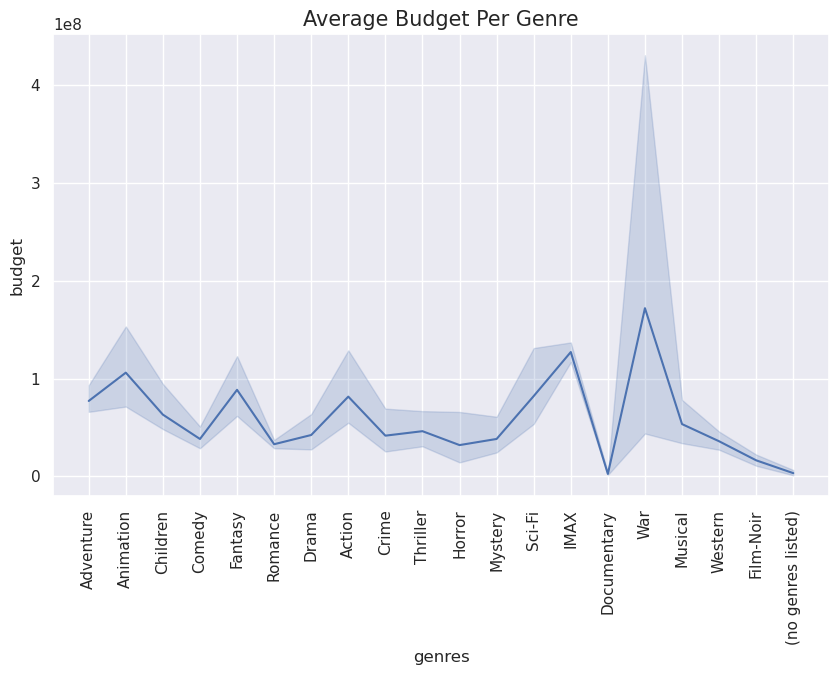

In [157]:
#Plotting an average budget per genre using a line-plot
plt.figure(figsize=(10,6))
axes=sns.lineplot(x="genres", y="budget", data=budget_per_genre)
axes.set_title('Average Budget Per Genre',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Observation:** Movies displayed on IMAX require the largest budget as IMAX are promoted as premium viewing options, thus have prices as high relative to regular-format movies as the market will bear. The extra costs of running an IMAX screening and the willingness of customers willing to pay the extra money for the IMAX experience.

The War genre clearly requires the biggest budget, and documentaries are the least expensive.

In [158]:
import plotly.express as px  #imporing visualization library plotly
genre_count=movies_metadata_df['director'].value_counts() 
genre_count = genre_count.dropna()
genre_count = genre_count[:10]
genre_count=pd.DataFrame(genre_count).reset_index() 
popular_genre=genre_count.rename(columns={'index':'Directors','director':'Count of ratings'})
fig = px.bar(popular_genre, y='Count of ratings', x='Directors', text='Directors') 
fig.update_layout(title_text='<b>Common Directors<b>',title_x=0.5)
fig.show()

**Observation:** Quentin Tarantino, in full Quentin Jerome Tarantino is an american director and screenwriter whose films are noted for their stylized violence, razor-sharp dialogue, and fascination with film and pop culture.and he believes that crime can make a movie pop.Tarantino's films often feature graphic violence, a tendency which has sometimes been criticized. 

## **Runtime**

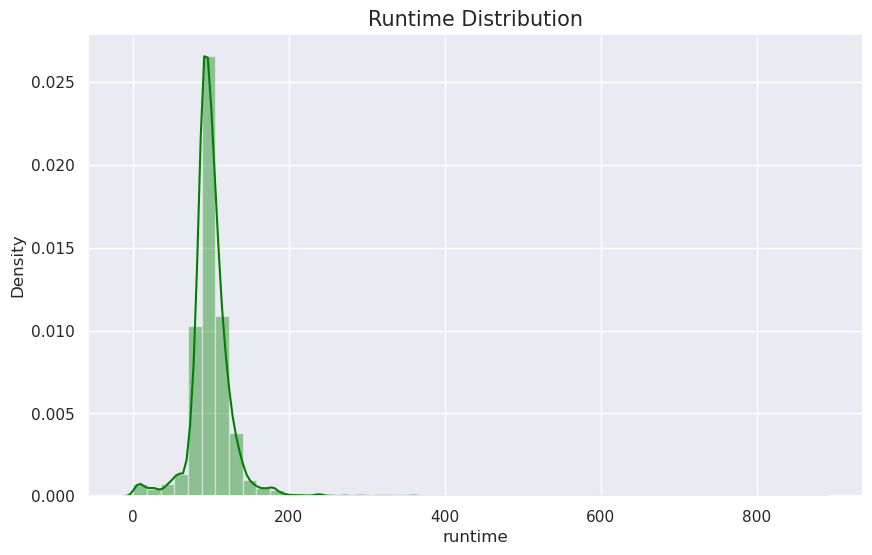

In [159]:
#Plotting distribution of movies's duration using dist-plot
plt.figure(figsize = (10,6))
axes=sns.distplot(imdb_data['runtime'],color='green')
axes.set_title('Runtime Distribution',fontsize=15)
plt.show()

**Observation:** The most common duration of a movie is around 90 minutes.

In [160]:
movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/movies.csv')
imdb_data = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')

In [161]:
movies_imdb= pd.merge(imdb_data,movies,on ='movieId',how ='inner')

In [162]:
#Create variable "runtime_genre"
runtime_per_genre=movies_imdb[['genres','runtime']].explode('genres')

In [163]:
runtime_per_genre.genres = runtime_per_genre.genres.apply(lambda x: x.split('|'))


runtime_per_genre = pd.DataFrame([(tup.runtime, d) for tup in runtime_per_genre.itertuples() for d in tup.genres],
                             columns=['runtime', 'genres'])

runtime_per_genre.dropna()

,runtime,genres
0,81.0,Adventure
1,81.0,Animation
2,81.0,Children
3,81.0,Comedy
4,81.0,Fantasy
...,...,...
49751,130.0,Adventure
49752,102.0,(no genres listed)
49753,96.0,Adventure
49754,96.0,Fantasy


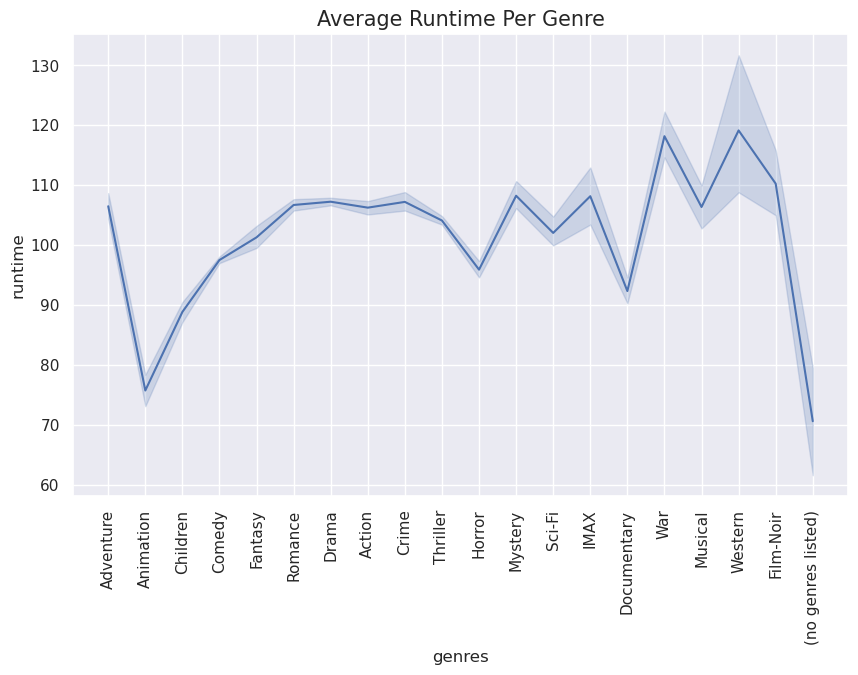

In [164]:
#Plotting an average runtime per genre using line-plot
plt.figure(figsize=(10,6))
axes=sns.lineplot(x="genres", y="runtime", data=runtime_per_genre)
axes.set_title('Average Runtime Per Genre',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Observation:** It can be observed that Western movies have the highest runtime whilst animation movies have the least runtime. We see that animation has the least runtime which is caused by the cost and the time involved, also because most animated films are aimed at children and children have a short attention span.

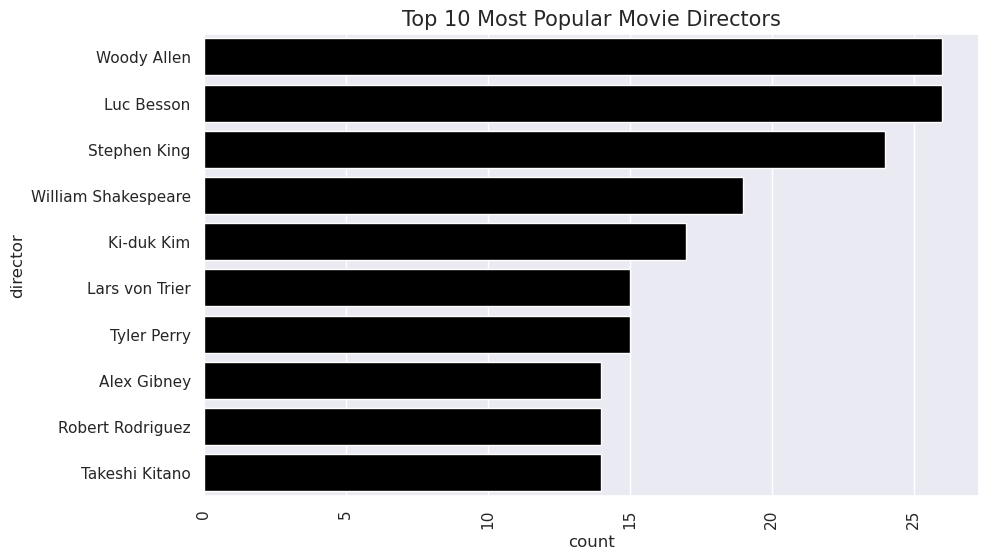

In [165]:
#Plotting top 10 movie directors using a count-plot
plt.figure(figsize = (10,6))
director=imdb_data['director']#.explode()
axes=sns.countplot(y=director, order = director.value_counts().index[1:11],color='black')
axes.set_title('Top 10 Most Popular Movie Directors',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Observation:** A number of popular directors based on the number of movies they have directed. We can observe that the most popular movie director is Luc Besson,because he has directed the most movies. 

In [166]:
imdb_data = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')

In [167]:
imdb_data['title_cast']=imdb_data['title_cast'].fillna("Unknown")
imdb_data['plot_keywords']=imdb_data['plot_keywords'].fillna("Unknown")

# Create dataframe containing only the movieId and title cast
title_cast = pd.DataFrame(imdb_data[['movieId', 'title_cast']],
                             columns=['movieId', 'title_cast'])
# Create dataframe containing only the movieId and keywords
plot_keywords = pd.DataFrame(imdb_data[['movieId', 'plot_keywords']],
                             columns=['movieId', 'plot_keywords'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
title_cast.title_cast = title_cast.title_cast.apply(lambda x: x.split('|'))
plot_keywords.plot_keywords = plot_keywords.plot_keywords.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
title_cast = pd.DataFrame([(tup.movieId, d) for tup in title_cast.itertuples() for d in tup.title_cast],
                             columns=['movieId', 'title_cast'])
plot_keywords = pd.DataFrame([(tup.movieId, d) for tup in plot_keywords.itertuples() for d in tup.plot_keywords],
                             columns=['movieId', 'plot_keywords'])


title_cast.head()

,movieId,title_cast
0,1,Tom Hanks
1,1,Tim Allen
2,1,Don Rickles
3,1,Jim Varney
4,1,Wallace Shawn


In [168]:
title_cast=title_cast[title_cast!= "Unknown"]
title_cast

,movieId,title_cast
0,1,Tom Hanks
1,1,Tim Allen
2,1,Don Rickles
3,1,Jim Varney
4,1,Wallace Shawn
...,...,...
249353,131262,Mikal Evans
249354,131262,Daniel Zovatto
249355,131262,Evelina Turen
249356,131262,Rachel Heller


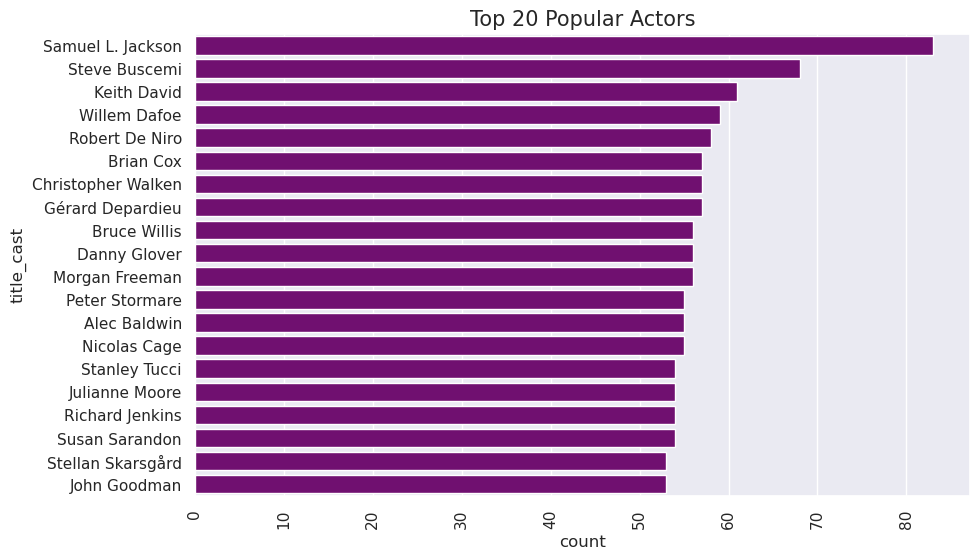

In [169]:
#Plotting popular cast using a count-plot
plt.figure(figsize = (10,6))
title_cast=title_cast.title_cast.explode()
ax=sns.countplot(y=title_cast, order = title_cast.value_counts().index[:20],color='purple')
ax.set_title('Top 20 Popular Actors',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Observation:** Samuel L Jackson seems to be the most popular actor as he appeared in over 80 movies from our database.

## **Modelling phase**

Here you can apply the models outline in the Intro to Recommender Notebook. You only need to apply one version 
be it Content based or Collabrative method

### **Collabrative method**

Collaborative filtering (CF) is a technique used by recommender systems. Collaborative filtering has two senses, a narrow one and a more general one.

In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person. For example, a collaborative filtering recommendation system for preferences in television programming could make predictions about which television show a user should like given a partial list of that user's tastes (likes or dislikes). Note that these predictions are specific to the user, but use information gleaned from many users. This differs from the simpler approach of giving an average (non-specific) score for each item of interest, for example based on its number of votes.

In the more general sense, collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources, etc. Applications of collaborative filtering typically involve very large data sets. Collaborative filtering methods have been applied to many different kinds of data including: sensing and monitoring data, such as in mineral exploration, environmental sensing over large areas or multiple sensors; financial data, such as financial service institutions that integrate many financial sources; or in electronic commerce and web applications where the focus is on user data, etc. The remainder of this discussion focuses on collaborative filtering for user data, although some of the methods and approaches may apply to the other major applications as well.

**Advantages**
* **No domain knowledge necessary**
We don't need domain knowledge because the embeddings are automatically learned.

* **Serendipity**
The model can help users discover new interests. In isolation, the ML system may not know the user is interested in a given item, but the model might still recommend it because similar users are interested in that item.

* **Great starting point**
To some extent, the system needs only the feedback matrix to train a matrix factorization model. In particular, the system doesn't need contextual features. In practice, this can be used as one of multiple candidate generators.

**Disadvantages**

* **Cannot handle fresh items**
The prediction of the model for a given (user, item) pair is the dot product of the corresponding embeddings. So, if an item is not seen during training, the system can't create an embedding for it and can't query the model with this item. This issue is often called the cold-start problem. However, the following techniques can address the cold-start problem to some extent:

* **Hard to include side features for query/item**
**Side features** are any features beyond the query or item ID. For movie recommendations, the side features might include country or age. Including available side features improves the quality of the model. Although it may not be easy to include side features in WALS, a generalization of WALS makes this possible.


In [170]:
# Apply your modelling here
cols = ['userId', 'movieId','rating']
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(train[cols],reader)
trainset, testset = train_test_split(data, test_size=0.10, random_state=42)
#cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=2, verbose=True)

In [171]:
nmf_model = NMF(n_epochs=20, n_factors=90, random_state=42,verbose=True)
nmf_model.fit(trainset)
nmf_predictions =nmf_model.test(testset)
nmf_rmse = accuracy.rmse(nmf_predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 1.7269


In [172]:
svd_model = SVD(n_epochs=20,n_factors=400,init_std_dev=0.01,random_state=42,verbose=True)
svd_model.fit(trainset)
svd_predictions = svd_model.test(testset)
svd_rmse = accuracy.rmse(svd_predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.8102


In [173]:
cc_model = CoClustering(n_epochs=20,random_state=42)
cc_model.fit(trainset)
cc_predictions = cc_model.test(testset)
cc_rmse=accuracy.rmse(cc_predictions)

RMSE: 0.8999


**Model performance**

In [174]:
rmse_scores =[nmf_rmse,cc_rmse,svd_rmse]
trained_models =['NMF','CoClustering','SVD']
model_performance = pd.DataFrame({'model':trained_models,'RMSE':rmse_scores})

In [175]:
model_performance.sort_values(by='RMSE')

,model,RMSE
2,SVD,0.810221
1,CoClustering,0.899928
0,NMF,1.726901


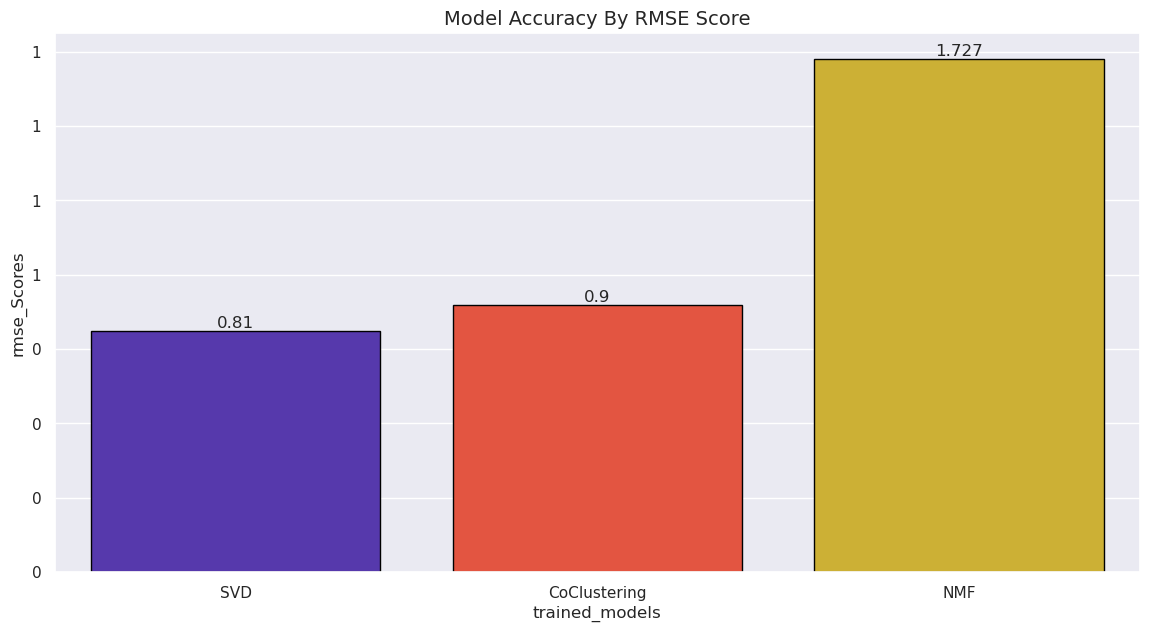

In [176]:
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=model_performance.sort_values(by='RMSE'), x='model', y='RMSE', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("trained_models")
ax.set_ylabel('rmse_Scores')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
plt.title('Model Accuracy By RMSE Score', fontsize=14)
plt.show()

### **Content-based Filtering**

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.

To demonstrate content-based filtering, let’s hand-engineer some features for the Google Play store. The following figure shows a feature matrix where each row represents an app and each column represents a feature. Features could include categories (such as Education, Casual, Health), the publisher of the app, and many others. To simplify, assume this feature matrix is binary: a non-zero value means the app has that feature.

You also represent the user in the same feature space. Some of the user-related features could be explicitly provided by the user. For example, a user selects "Entertainment apps" in their profile. Other features can be implicit, based on the apps they have previously installed. For example, the user installed another app published by Science R Us.

The model should recommend items relevant to this user. To do so, you must first pick a similarity metric (for example, dot product). Then, you must set up the system to score each candidate item according to this similarity metric. Note that the recommendations are specific to this user, as the model did not use any information about other users.

**Advantages :**
The model doesn't need any data about other users, since the recommendations are specific to this user. This makes it easier to scale to a large number of users.
The model can capture the specific interests of a user, and can recommend niche items that very few other users are interested in.

**Disadvantages :**
Since the feature representation of the items are hand-engineered to some extent, this technique requires a lot of domain knowledge. Therefore, the model can only be as good as the hand-engineered features.
The model can only make recommendations based on existing interests of the user. In other words, the model has limited ability to expand on the users' existing interests.

### How it works 

In [179]:
movies_metadata_df = pd.merge(movies_metadata_df,tags)

movies_metadata_df['directors_tags'] = (pd.Series(movies_metadata_df[['director', 'tag']]
                      .fillna('')
                      .values.tolist()).str.join(' '))

# Convienient indexes to map between book titles and indexes of 
# the books dataframe
titles = movies_metadata_df['title']
indices = pd.Series(movies_metadata_df.index, index=movies_metadata_df['title'])
display(indices.head(20))

title
Aloha                                                                                   0
Dead Man Walking                                                                        1
Lost Highway                                                                            2
Shrooms                                                                                 3
No Country for Old Men                                                                  4
No Country for Old Men                                                                  5
Arsenic and Old Lace                                                                    6
Ender's Game                                                                            7
What We Do in the Shadows                                                               8
What We Do in the Shadows                                                               9
Total Recall                                                                           10
Insi

In [180]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(movies_metadata_df['directors_tags'])

In [181]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix, 
                                        tf_authTags_matrix)
print (cosine_sim_authTags.shape)

(70, 70)


In [182]:
def content_generate_top_N_recommendations(book_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[book_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_authTags[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    book_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[book_indices]

In [188]:
content_generate_top_N_recommendations('The DUFF', N=10)

0                        Aloha
1             Dead Man Walking
2                 Lost Highway
3                      Shrooms
4       No Country for Old Men
5       No Country for Old Men
6         Arsenic and Old Lace
7                 Ender's Game
8    What We Do in the Shadows
Name: title, dtype: object

In [189]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/orifuna-oreo/unsupervised-learning/b196c177c3d44022ad3f548208b4b075
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     os packages                  : 1
COMET INFO:     source_code                  : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following m

# **Conclusion**

Throughout this notebook we have taken a comprehensive look at the data in order to gain insights and assist us in predicting ratings as well as building recommendation systems.

For Both the collaborative and content-based filtering we implemented a few models to find a model that gives us the best rmse score which is a representation of your model performance. The model with the best rmse score was the singular value decomposition(SVD). The SVD performed better since it is very good at noise detection and does this by reducing the dimensions of a matrix in order to make certain subsequent matrix calculations simpler. By implementing SVD, which returned a very good RMSE score of 0.81 we can conclude that the algorithm implemented for our app is very good at movie recommendations.

# **Generate your outputs here**

Prepare Submission File
We make submissions in CSV files. Your submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the data is the string 'Id'). The prediction column will use the name of the target field.

We will create a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. Explicitly include the argument index=False to prevent pandas from adding another column in our csv file.

In [190]:
#Converting the predictions to a dataframe
submission= pd.DataFrame(svd_predictions)

In [191]:
submission.to_csv('submission.csv', index=False)